In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [73]:
df = pd.read_csv("https://raw.githubusercontent.com/askoshiyama/code_club/master/mortgage_data_balanced.csv")

In [4]:
keep_vars = ['respondent_id', 'as_of_year', 'agency_abbr', 'loan_type_name', 'loan_amount_000s', 'owner_occupancy_name',
             'loan_purpose_name', 'property_type_name', 'preapproval_name', 'msamd_name', 'state_abbr', 'county_name',
             'applicant_ethnicity_name', 'co_applicant_ethnicity_name', 'applicant_race_name_1', 'co_applicant_race_name_1',
             'applicant_sex_name', 'co_applicant_sex_name', 'applicant_income_000s', 'purchaser_type_name', 
             'denial_reason_name_1', 'hoepa_status_name', 'lien_status_name', 'population', 'minority_population',
             'hud_median_family_income', 'tract_to_msamd_income', 'number_of_owner_occupied_units', 
             'number_of_1_to_4_family_units', 'action_taken_name']

df = df[keep_vars].copy()

In [5]:
df['action_taken_name'].value_counts()

Loan originated                                2513
Application denied by financial institution    2487
Name: action_taken_name, dtype: int64

In [7]:
pd.crosstab(df["applicant_ethnicity_name"], df["action_taken_name"])/5000 * 100.0

action_taken_name,Application denied by financial institution,Loan originated
applicant_ethnicity_name,,
Hispanic or Latino,4.16,2.50
Not Hispanic or Latino,45.58,47.76


In [8]:
pd.crosstab(df["applicant_race_name_1"], df["action_taken_name"])/5000 * 100.0

action_taken_name,Application denied by financial institution,Loan originated
applicant_race_name_1,,
American Indian or Alaska Native,0.52,0.18
Asian,2.66,3.26
Black or African American,5.68,2.24
Native Hawaiian or Other Pacific Islander,0.26,0.06
White,40.62,44.52


In [9]:
pd.crosstab(df["applicant_sex_name"], df["action_taken_name"])/5000 * 100.0

action_taken_name,Application denied by financial institution,Loan originated
applicant_sex_name,,
Female,16.66,13.44
Male,33.08,36.82


In [13]:
# categorical variables
cat_variables = cat_variables = ['applicant_ethnicity_name', 'applicant_race_name_1', 'applicant_sex_name', 'agency_abbr',
                                 'owner_occupancy_name', 'property_type_name', 'loan_purpose_name', 'loan_type_name']

# other integer variables
int_variables = ['loan_amount_000s', 'applicant_income_000s', 'population', 'minority_population', 
                 'hud_median_family_income', 'tract_to_msamd_income', 'number_of_owner_occupied_units', 
                 'number_of_1_to_4_family_units']

# target variable
output_variable = ['action_taken_name']

### Pre-processing
# Mapping categorical variables to one-hot encoding
df_cat = pd.DataFrame(index=df.index)

# one-hot encoding of categorical variables
from sklearn.preprocessing import OneHotEncoder

# I will do a loop for pedagogical reasons, but it is not entirely necessary
for cat in cat_variables:
    # one-hot encoding fitting
    one_hot_func = OneHotEncoder().fit(df[[cat]])
    
    # mapping
    cat_mapped = one_hot_func.transform(df[[cat]]).toarray()
    
    # storing
    for (k, cat_label) in enumerate(one_hot_func.categories_[0]):
        df_cat[cat + "_" + cat_label] = cat_mapped[:, k]

# consolidating a final dataset
X = pd.concat([df[int_variables], df_cat], axis=1)
y = (df[output_variable] == "Loan originated").copy()

# removing race, ethnicity, sex and minority population from X
X_ub = X[[
    'loan_amount_000s', 'applicant_income_000s', 'population', 'hud_median_family_income', 'tract_to_msamd_income', 
    'number_of_owner_occupied_units', 'number_of_1_to_4_family_units', 'agency_abbr_CFPB', 'agency_abbr_FDIC',
       'agency_abbr_FRS', 'agency_abbr_HUD', 'agency_abbr_NCUA',
       'agency_abbr_OCC', 'owner_occupancy_name_Not applicable',
       'owner_occupancy_name_Not owner-occupied as a principal dwelling',
       'owner_occupancy_name_Owner-occupied as a principal dwelling',
       'property_type_name_Manufactured housing',
       'property_type_name_One-to-four family dwelling (other than manufactured housing)',
       'loan_purpose_name_Home improvement', 'loan_purpose_name_Home purchase',
       'loan_purpose_name_Refinancing', 'loan_type_name_Conventional',
       'loan_type_name_FHA-insured', 'loan_type_name_FSA/RHS-guaranteed',
       'loan_type_name_VA-guaranteed'
]].copy()

# protected attributtes
X_groups = X[[
    'minority_population', 'applicant_ethnicity_name_Hispanic or Latino',
       'applicant_ethnicity_name_Not Hispanic or Latino',
       'applicant_race_name_1_American Indian or Alaska Native',
       'applicant_race_name_1_Asian',
       'applicant_race_name_1_Black or African American',
       'applicant_race_name_1_Native Hawaiian or Other Pacific Islander',
       'applicant_race_name_1_White', 'applicant_sex_name_Female',
       'applicant_sex_name_Male'
]].copy()


In [14]:
X.describe()

,loan_amount_000s,applicant_income_000s,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,applicant_ethnicity_name_Hispanic or Latino,applicant_ethnicity_name_Not Hispanic or Latino,...,owner_occupancy_name_Owner-occupied as a principal dwelling,property_type_name_Manufactured housing,property_type_name_One-to-four family dwelling (other than manufactured housing),loan_purpose_name_Home improvement,loan_purpose_name_Home purchase,loan_purpose_name_Refinancing,loan_type_name_Conventional,loan_type_name_FHA-insured,loan_type_name_FSA/RHS-guaranteed,loan_type_name_VA-guaranteed
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,188.47100,100.106400,5739.743600,21.953384,69228.460000,115.593274,1601.492800,2063.751600,0.066600,0.933400,...,0.890800,0.030800,0.969200,0.07520,0.289200,0.63560,0.806200,0.146000,0.014800,0.033000
std,164.32887,112.223575,2936.536592,22.271644,14070.949447,37.167028,906.289128,1113.332253,0.249353,0.249353,...,0.311921,0.172793,0.172793,0.26374,0.453436,0.48131,0.395314,0.353142,0.120764,0.178654
min,1.00000,1.000000,500.000000,0.600000,16300.000000,23.190001,19.000000,43.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,86.00000,45.000000,3788.750000,6.350000,60000.000000,91.677500,1021.000000,1346.750000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.00000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
50%,149.00000,73.000000,5197.500000,13.780000,66600.000000,109.535000,1443.000000,1847.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.00000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000
75%,247.00000,119.000000,6955.000000,29.170000,76700.000000,132.440002,1967.750000,2484.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.00000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000
max,2500.00000,2000.000000,34055.000000,99.809998,111900.000000,390.839996,9880.000000,10724.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


# Model-specific Explanations

## Decision-trees (https://scikit-learn.org/stable/modules/tree.html#tree)

#### Set model

In [74]:
# fit and cross-validate model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

## classification tree
model = DecisionTreeClassifier(max_depth=2, criterion="gini", class_weight="balanced")

## performance metrics
perf_metrics = {"Accuracy": metrics.accuracy_score, 
                "Precision": metrics.precision_score, 
                "Recall": metrics.recall_score,
                "AUC": metrics.roc_auc_score, 
                "F1-Score": metrics.f1_score, 
                "Brier": metrics.brier_score_loss
               } # https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

## 10-fold cv
k_folds = StratifiedKFold(n_splits=10, random_state=10, shuffle=True) # https://scikit-learn.org/stable/modules/cross_validation.html

#### Fit and Validate

In [75]:
df_metrics = pd.DataFrame(index=range(10), columns=perf_metrics.keys())

# main loop
k = 0
for (train, test) in k_folds.split(X_ub, y):
    # fit model
    model.fit(X_ub.values[train], y.values[train])
       
    # test model
    ypred_class = model.predict(X_ub.values[test])
    ypred_prob = model.predict_proba(X_ub.values[test])[:, 1]

    # compute performance metrics
    for pf in perf_metrics.keys():
        if pf in ["AUC", "Brier"]:
            df_metrics.loc[k, pf] = perf_metrics[pf](y.values[test], ypred_prob)
        else:
            df_metrics.loc[k, pf] = perf_metrics[pf](y.values[test], ypred_class)
    k += 1

#### Performance metrics

In [34]:
df_metrics

,Accuracy,Precision,Recall,AUC,F1-Score,Brier
0,0.602,0.70229,0.365079,0.651194,0.480418,0.230183
1,0.608,0.71875,0.365079,0.66097,0.484211,0.228347
2,0.566,0.635659,0.325397,0.615463,0.430446,0.240093
3,0.596,0.582492,0.689243,0.642122,0.631387,0.232941
4,0.588,0.657343,0.374502,0.62281,0.477157,0.238476
5,0.578,0.572464,0.629482,0.630794,0.59962,0.234111
6,0.542,0.541985,0.565737,0.580457,0.553606,0.243732
7,0.59,0.580986,0.657371,0.63377,0.616822,0.232712
8,0.558,0.627119,0.294821,0.601666,0.401084,0.240723
9,0.6,0.691729,0.366534,0.649698,0.479167,0.231897


In [35]:
df_metrics.mean()

Accuracy     0.582800
Precision    0.631082
Recall       0.463324
AUC          0.628895
F1-Score     0.515392
Brier        0.235321
dtype: float64

### Global Explanations

In [17]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file="class_tree.dot", feature_names=X_ub.columns, 
                class_names = ["Denied", "Originated"], rounded = True)

#### go to http://webgraphviz.com/ and paste class_tree.dot text

Text(0.5, 0, 'Income 000s')

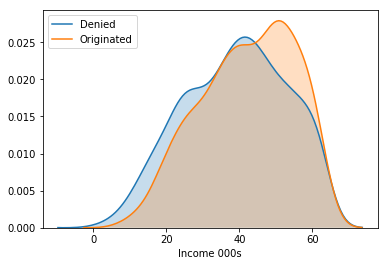

In [23]:
denied_income = X.loc[((y.values == 0) & 
                            (X["applicant_income_000s"].values.reshape(-1, 1) <= 63.5)).reshape(1, -1)[0], 
                           'applicant_income_000s']
originated_income = X.loc[((y.values == 1) & 
                          (X["applicant_income_000s"].values.reshape(-1, 1) <= 63.5)).reshape(1, -1)[0], 
                         'applicant_income_000s']
ax = sns.kdeplot(denied_income, shade=True, shade_lowest=False, label="Denied")
ax = sns.kdeplot(originated_income, shade=True, shade_lowest=False, label="Originated")
ax.set_xlabel("Income 000s")

### Local Explanations

In [90]:
# The decision estimator has an attribute called tree_  which stores the entire
# tree structure and allows access to low level attributes. The binary tree
# tree_ is represented as a number of parallel arrays. The i-th element of each
# array holds information about the node `i`. Node 0 is the tree's root. NOTE:
# Some of the arrays only apply to either leaves or split nodes, resp. In this
# case the values of nodes of the other type are arbitrary!
#
# Among those arrays, we have:
#   - left_child, id of the left child of the node
#   - right_child, id of the right child of the node
#   - feature, feature used for splitting the node
#   - threshold, threshold value at the node

#n_nodes = # The decision estimator has an attribute called tree_  which stores the entire
# tree structure and allows access to low level attributes. The binary tree
# tree_ is represented as a number of parallel arrays. The i-th element of each
# array holds information about the node `i`. Node 0 is the tree's root. NOTE:
# Some of the arrays only apply to either leaves or split nodes, resp. In this
# case the values of nodes of the other type are arbitrary!
#
# Among those arrays, we have:
#   - left_child, id of the left child of the node
#   - right_child, id of the right child of the node
#   - feature, feature used for splitting the node
#   - threshold, threshold value at the node

n_nodes = model.tree_.node_count
children_left = model.tree_.children_left
children_right = model.tree_.children_right
feature = model.tree_.feature
threshold = model.tree_.threshold

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = model.decision_path(X_ub)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = model.apply(X_ub)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

# HERE IS WHAT YOU WANT
sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:

    if leave_id[sample_id] == node_id:  # <-- changed != to ==
        #continue # <-- comment out
        print("leaf node {} reached, no decision here".format(leave_id[sample_id])) # <--

    else: # < -- added else to iterate through decision nodes
        if (X_ub.iloc[sample_id][feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("decision id node %s : (X[%s, %s] (= %s) %s %s)"
              % (node_id,
                 sample_id,
                 feature[node_id],
                 X_ub.iloc[sample_id][feature[node_id]], # <-- changed i to sample_id
                 threshold_sign,
                 threshold[node_id]))
children_left = model.tree_.children_left
children_right = model.tree_.children_right
feature = model.tree_.feature
threshold = model.tree_.threshold

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()


The binary tree structure has 7 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 1] <= 63.5 else to node 4.
	node=1 test node: go to node 2 if X[:, 0] <= 38.5 else to node 3.
		node=2 leaf node.
		node=3 leaf node.
	node=4 test node: go to node 5 if X[:, 7] <= 0.5 else to node 6.
		node=5 leaf node.
		node=6 leaf node.

Rules used to predict sample 0: 
decision id node 0 : (X[0, 1] (= 38.0) <= 63.5)
decision id node 1 : (X[0, 0] (= 99.0) > 38.5)
leaf node 3 reached, no decision here
The binary tree structure has 7 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 1] <= 63.5 else to node 4.
	node=1 test node: go to node 2 if X[:, 0] <= 38.5 else to node 3.
		node=2 leaf node.
		node=3 leaf node.
	node=4 test node: go to node 5 if X[:, 7] <= 0.5 else to node 6.
		node=5 leaf node.
		node=6 leaf node.



# Model-agnostic

## Feed Forward Neural Network (https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

#### Set model

In [48]:
# fit and cross-validate model
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler # https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

## neural net
model = Pipeline( (
        ("pre", StandardScaler()),
        ("nn", MLPClassifier(hidden_layer_sizes=(50, 50, ), 
                             activation='relu', solver="lbfgs", random_state=10))
) ) # https://scikit-learn.org/stable/modules/compose.html#pipeline-chaining-estimators


## performance metrics
perf_metrics = {"Accuracy": metrics.accuracy_score, 
                "Precision": metrics.precision_score, 
                "Recall": metrics.recall_score,
                "AUC": metrics.roc_auc_score, 
                "F1-Score": metrics.f1_score, 
                "Brier": metrics.brier_score_loss
               }

## 10-fold cv
k_folds = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)

#### Fit and validate

In [49]:
df_metrics = pd.DataFrame(index=range(10), columns=perf_metrics.keys())

# main loop
k = 0
for (train, test) in k_folds.split(X_ub, y):
    # fit model
    model.fit(X_ub.values[train], y.values[train])
       
    # test model
    ypred_class = model.predict(X_ub.values[test])
    ypred_prob = model.predict_proba(X_ub.values[test])[:, 1]

    # compute performance metrics
    for pf in perf_metrics.keys():
        if pf in ["AUC", "Brier"]:
            df_metrics.loc[k, pf] = perf_metrics[pf](y.values[test], ypred_prob)
        else:
            df_metrics.loc[k, pf] = perf_metrics[pf](y.values[test], ypred_class)
    k += 1

C:\Users\Koshiyama\Anaconda3-64bit\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Koshiyama\Anaconda3-64bit\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Koshiyama\Anaconda3-64bit\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Koshiyama\Anaconda3-64bit\lib\site-packages\s

#### Performance metrics

In [50]:
df_metrics

,Accuracy,Precision,Recall,AUC,F1-Score,Brier
0,0.58,0.59292,0.531746,0.627736,0.560669,0.314329
1,0.628,0.635246,0.615079,0.66273,0.625,0.27796
2,0.612,0.620833,0.59127,0.63092,0.605691,0.306525
3,0.612,0.616327,0.601594,0.63033,0.608871,0.297396
4,0.602,0.601562,0.613546,0.629962,0.607495,0.299915
5,0.576,0.575875,0.589641,0.592825,0.582677,0.324383
6,0.62,0.626556,0.601594,0.64761,0.613821,0.288477
7,0.576,0.573585,0.605578,0.59921,0.589147,0.320984
8,0.578,0.57874,0.585657,0.584169,0.582178,0.334097
9,0.606,0.617391,0.565737,0.62769,0.590437,0.306562


In [51]:
df_metrics.mean()

Accuracy     0.599000
Precision    0.603904
Recall       0.590144
AUC          0.623318
F1-Score     0.596599
Brier        0.307063
dtype: float64

### Global 

#### Permutation importance (https://scikit-learn.org/stable/modules/permutation_importance.html)

In [ ]:
from sklearn.inspection import permutation_importance
feat_imp = permutation_importance(model, X_ub, y, n_repeats=5, random_state=10)
df_featimp = pd.DataFrame({"Variable": X_ub.columns,
                           "Importance": feat_imp['importances_mean']/feat_imp["importances_mean"].max()})
df_featimp = df_featimp.sort_values("Importance", ascending=False)

# chart
df_featimp.iloc[:5].plot(x="Variable", y="Importance", kind="barh")

#### Partial dependence (https://scikit-learn.org/stable/modules/partial_dependence.html#partial-dependence)

C:\Users\Koshiyama\Anaconda3-64bit\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:323: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


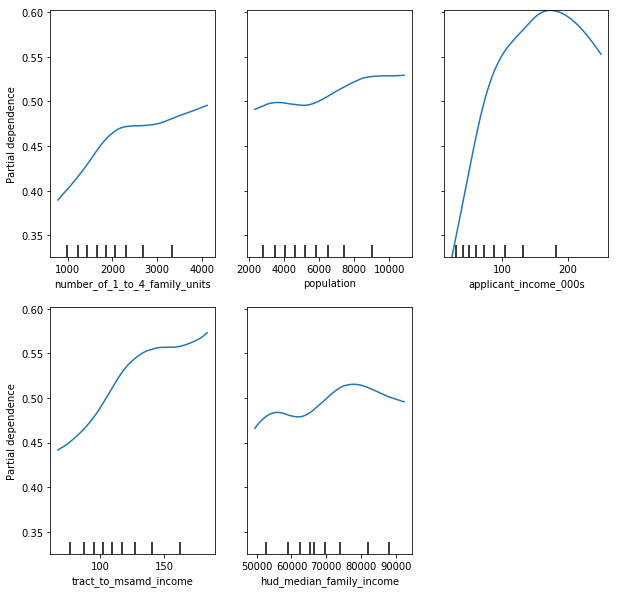

In [64]:
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(figsize=(10, 10))
plot_partial_dependence(model, X_ub, df_featimp.iloc[:5].index, 
                        fig=fig, response_method="predict_proba", 
                        method="brute", grid_resolution=200
                       ) 

C:\Users\Koshiyama\Anaconda3-64bit\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:323: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


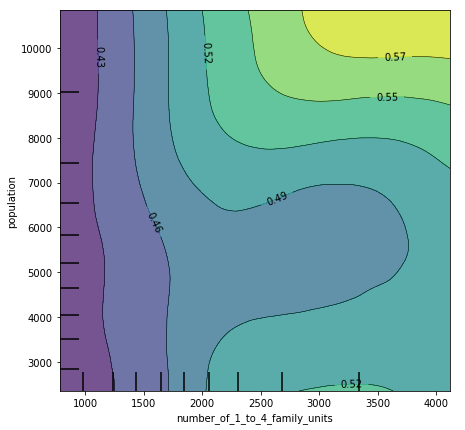

In [65]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_partial_dependence(model, X_ub, [(df_featimp.index[0], df_featimp.index[1])], fig=fig, 
                        response_method="predict_proba", method="brute")

## Local

### LIME Algorithm (https://github.com/marcotcr/lime)